# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [28]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
from plotnine import *

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [29]:
%%capture
df_titanic["class"].unique()

In [30]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant staff": "crew"
})
df_titanic_passenger = df_titanic[df_titanic["type"] == "passenger"]

joint = pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"],normalize= True)
joint

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?  
  0.540481
* What proportion of Southampton passengers were in 3rd class?  
  0.696756

The conditional distribution of their class given where they embarked

In [31]:
# sum(axis=0) a series with the summary of every column
# axis=0: by column(vertical), axis=1: by row(horizontal)
# a.div(b) = a/b
# div(joint.sum(axis=0), axis=1): joint.sum(axis=0) is the denominator, axis=1 means divide along horizontal(in each column)

cond_embarked = joint.div(joint.sum(axis=0), axis=1)
cond_embarked


embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


The conditional distribution of where they embarked given their class

In [32]:
cond_class = joint.div(joint.sum(axis=1), axis=0)
cond_class

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


What proportion of 3rd class passengers embarked at Southampton?

In [33]:
df_Southampton = df_titanic_passenger[df_titanic_passenger["embarked"] == "S"]
df_Southampton["class"].value_counts(normalize=True)

class
3rd    0.540481
2nd    0.268053
1st    0.191466
Name: proportion, dtype: float64

What proportion of Southampton passengers were in 3rd class?

In [34]:
df_third = df_titanic_passenger[df_titanic_passenger["class"] == "3rd"]
df_third["embarked"].value_counts(normalize=True)

embarked
S    0.696756
Q    0.159379
C    0.143865
Name: proportion, dtype: float64

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

I used a bar plot to present the distribution of each class within each port of embarkation. The plot includes text labels for each proportion, making it easy to compare the distributions between different ports. However, if the plot does not include proportion text labels, it can be challenging to tell the precise differences in proportions just by looking at the colors.

In [35]:
cond_embarked["class"]=cond_embarked.index

In [36]:
cond_embarked = cond_embarked.melt(id_vars=["class"], var_name="embarked", value_name="proportion")

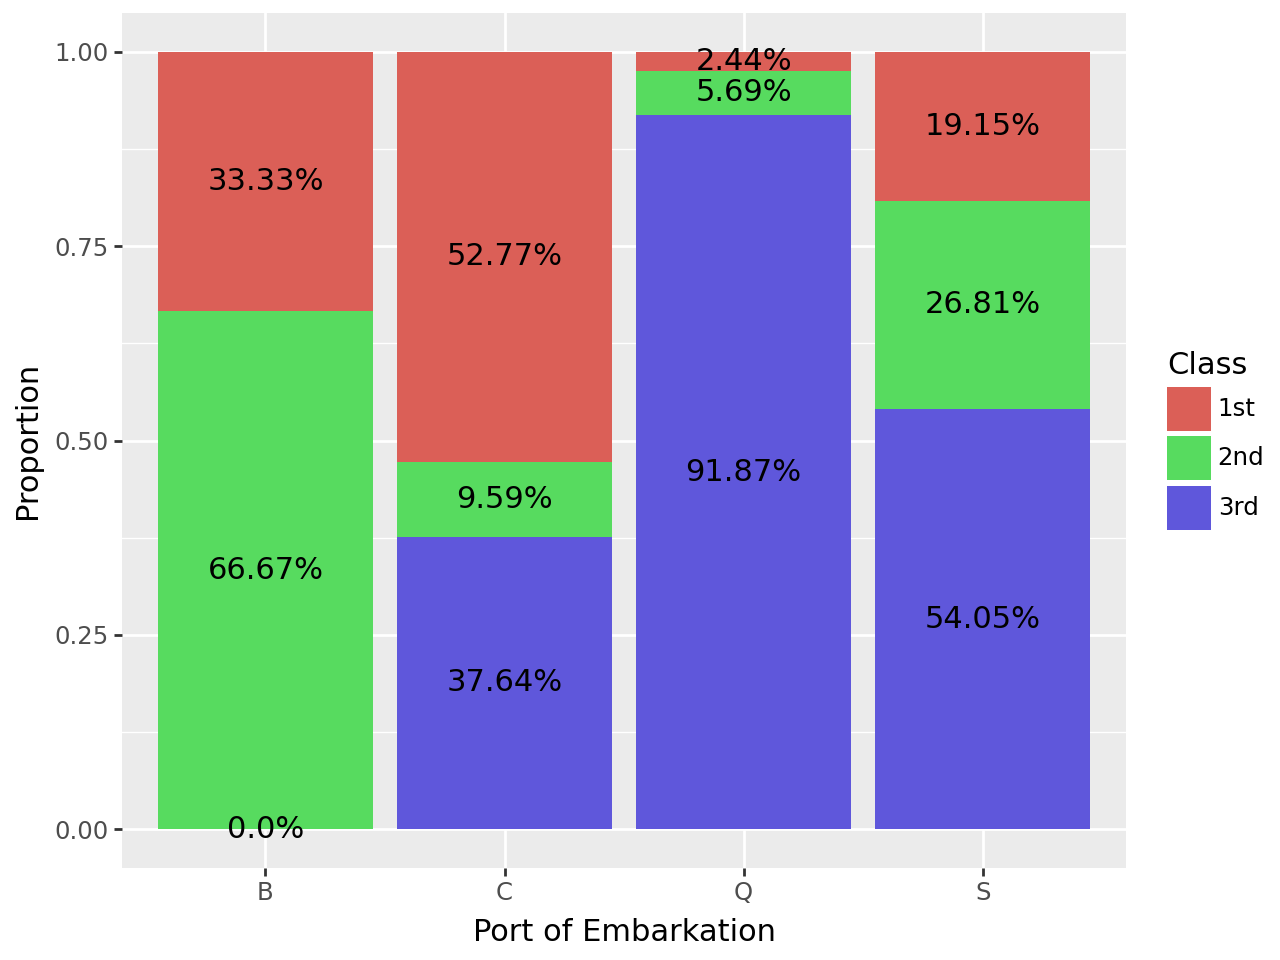

In [37]:
(ggplot(cond_embarked, aes(x="embarked", y= "proportion", fill="class"))
 + geom_bar(stat='identity',position="fill")
 + geom_text(aes(label=(cond_embarked['proportion']*100).round(2).astype(str)+"%")
                    ,position=position_fill(vjust=0.5)  # Center the text vertically
                    )
 +labs(x="Port of Embarkation", y="Proportion", fill="Class")
)